In [1]:
import cebra

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch

In [3]:
#Load the dataset
subject_1 = pd.read_csv('tb2994_2D_info.csv')

In [4]:
#Load the dataset
subject_2 = pd.read_csv('tb3784_2D_info.csv')

In [3]:
subject_3 = pd.read_csv('tb3132_2D_info.csv')

In [4]:
print("Original DataFrame:")

subject_3.head()

Original DataFrame:


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
0,0,0.878027,0.044637,0.644072,-0.326938,1.445836,0.025245,-1.090385,-0.504548,-2.194423,...,-0.240649,0.686664,-2.785192,-1.857962,-3.276046,-0.211270,2.118586,2.094014,0.199074,0.381485
1,0,2.048818,0.126128,2.069279,1.637755,0.971749,0.396473,-1.007654,-1.569249,-2.463049,...,-0.471296,0.546587,-3.035961,-2.526164,-3.284048,-0.707426,0.717482,1.610308,-0.241124,0.651143
2,0,2.226076,1.010553,1.427267,-1.826182,1.549446,-0.786238,-2.482985,-1.329038,-3.543993,...,-0.525147,1.612157,-4.451466,-3.850709,-5.387500,-0.829241,2.273637,2.755172,-0.088334,0.760841
3,0,2.980306,0.621778,1.932738,-0.073262,0.073070,-0.842283,-2.495671,-2.563831,-2.935846,...,-0.492476,2.128170,-3.503704,-3.620445,-4.148773,-1.090306,0.721671,1.576715,-0.443097,0.311556
4,0,-1.170429,-1.484852,0.381679,-1.105377,2.570951,1.280429,-1.222923,-0.631308,-4.845217,...,-1.464718,-0.245098,-6.318064,-6.079192,-8.145751,-1.481998,2.878928,2.725092,-1.173241,0.482737


In [5]:
#for cebra no NaN Value should be given as input to better to check if any NaN values and then 
#decide whether to drop them or replace them
na_column = subject_3.isna().sum()
na_total = subject_3.isna().sum().sum()
print("Number of NaN values in each column:")
print(na_column)
print("Total number of NaN values in the DataFrame:", na_total)

Number of NaN values in each column:
Unnamed: 0    0
0             0
1             0
2             0
3             0
             ..
1305          0
1306          0
1307          0
1308          0
1309          0
Length: 1311, dtype: int64
Total number of NaN values in the DataFrame: 0


In [7]:
def preprocess_dataframe(df):
    # Exclude 'Unnamed: 0' during normalization
    columns_to_normalize = [col for col in df.columns if col != 'Unnamed: 0']

    # Normalize the DataFrame except for 'Unnamed: 0'
    scaler = StandardScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

    # Filter all rows here, this was done for the indiviual brain region but then limit was increased to 200 as computation problem was solved
    df_filtered = df[df['Unnamed: 0'].isin(range(200))].copy()

    # Drop the first column (i.e., 'Unnamed: 0') for further processing
    df_filtered = df_filtered.drop(columns=['Unnamed: 0'], axis=1)

    # Transpose and convert to a PyTorch tensor
    df_transposed = df_filtered.T
    df_tensor = torch.tensor(df_transposed.values, dtype=torch.float32)

    return df_tensor

In [5]:
subject_1_tensor = preprocess_dataframe(subject_1)

NameError: name 'preprocess_dataframe' is not defined

In [ ]:
subject_1_tensor.shape

# Run the below cells only if you want storywise Tensors

In [7]:
def preprocess_dataframe_storywise(df):
    # Drop the 'Unnamed: 0' column
    df_filtered = df.drop(columns=['Unnamed: 0'], axis=1)

    # Split the columns into three parts based on the story parts
    split_1 = df_filtered.iloc[:, :526]   # Columns 0 to 525
    split_2 = df_filtered.iloc[:, 526:526+452]  # Columns 526 to 977
    split_3 = df_filtered.iloc[:, 526+452:]  # Columns 978 to the last column

    # Normalize each split independently
    scaler_1 = StandardScaler()
    df_split_1_normalized = scaler_1.fit_transform(split_1)

    scaler_2 = StandardScaler()
    df_split_2_normalized = scaler_2.fit_transform(split_2)

    scaler_3 = StandardScaler()
    df_split_3_normalized = scaler_3.fit_transform(split_3)

    # Transpose each normalized split and convert to PyTorch tensors
    tensor_1 = torch.tensor(df_split_1_normalized.T, dtype=torch.float32)
    tensor_2 = torch.tensor(df_split_2_normalized.T, dtype=torch.float32)
    tensor_3 = torch.tensor(df_split_3_normalized.T, dtype=torch.float32)

    return tensor_1, tensor_2, tensor_3


In [8]:
tensor_1, tensor_2, tensor_3 = preprocess_dataframe_storywise(subject_1)
print(f"Tensor 1 shape: {tensor_1.shape}") 
print(f"Tensor 2 shape: {tensor_2.shape}")  
print(f"Tensor 3 shape: {tensor_3.shape}")  

Tensor 1 shape: torch.Size([526, 139501])
Tensor 2 shape: torch.Size([452, 139501])
Tensor 3 shape: torch.Size([332, 139501])


In [9]:
tensor_1_s2, tensor_2_s2, tensor_3_s2 = preprocess_dataframe_storywise(subject_2)
print(f"Tensor 1 shape: {tensor_1_s2.shape}") 
print(f"Tensor 2 shape: {tensor_2_s2.shape}")  
print(f"Tensor 3 shape: {tensor_3_s2.shape}")  

Tensor 1 shape: torch.Size([526, 139501])
Tensor 2 shape: torch.Size([452, 139501])
Tensor 3 shape: torch.Size([332, 139501])


In [11]:
concatenated_tensor = torch.cat((tensor_1, tensor_1_s2), dim=0)

# Print the new shape
print(concatenated_tensor.shape)

torch.Size([1052, 139501])


#Defining CEBRA Model Parameters and fitting and Transforming it.

In [16]:
cebra_time_scaled = cebra.CEBRA(
        model_architecture="offset10-model",
        batch_size=512,
        learning_rate=0.01,
        temperature=2.0,
        output_dimension=3,
        num_hidden_units=512,
        max_iterations=10000,
        distance="euclidean",
        conditional="time",
        device="cuda_if_available",
        verbose=True,
        time_offsets=1,
        max_adapt_iterations=5000,
    )

In [17]:
# Fit the model and transform the data
cebra_time_scaled.fit(tensor_1)
embeddings_scaled_3d_s1_10000_story_1_adapt_5000 = cebra_time_scaled.transform(tensor_1)
#change the name of the embeddings when you save.


pos:  0.0017 neg:  5.3989 total:  5.4005 temperature:  2.0000: 100%|██████████| 10000/10000 [1:36:46<00:00,  1.72it/s]


In [18]:
cebra_time_scaled.fit(tensor_1_s2,adapt='True')
embeddings_scaled_3d_s2_10000_story_1_adapt_5000 = cebra_time_scaled.transform(tensor_1_s2)

pos:  0.0103 neg:  5.4020 total:  5.4123 temperature:  2.0000: 100%|██████████| 5000/5000 [49:06<00:00,  1.70it/s]


In [19]:
np.save('embeddings_scaled_3d_s2_10000_story_1_adapt_5000.npy',embeddings_scaled_3d_s2_10000_story_1_adapt_5000)

In [ ]:
# Fit the model and transform the data
cebra_time_scaled.fit(subject_2_tensor_1)
embeddings_scaled_3d_s2_10000_story_1 = cebra_time_scaled.transform(subject_2_tensor_1)
np.save('embeddings_scaled_3d_s1_10000_story_1.npy',embeddings_scaled_3d_s2_10000_story_1)

<Axes3D: title={'center': '3D Cebra Time'}>

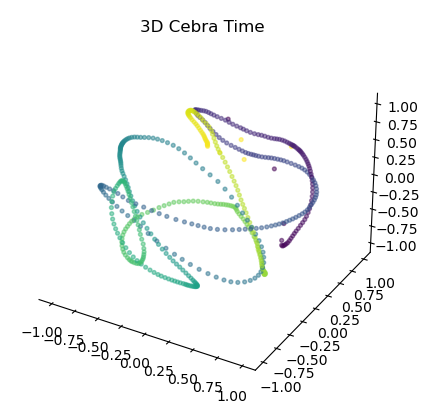

In [20]:
import matplotlib.pyplot as plt

cebra.plot_embedding(
    embeddings_scaled_3d_s1_10000_story_1_adapt_5000,  
    embedding_labels='time',     
    cmap='cebra',                
    markersize=7.5,
    alpha=0.5,
    title="3D Cebra Time",
    
)



<Axes3D: title={'center': '3D Cebra Time'}>

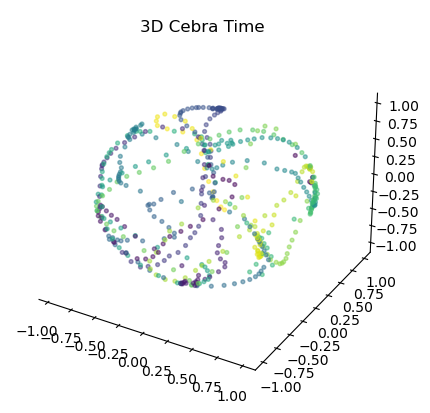

In [21]:
import matplotlib.pyplot as plt

cebra.plot_embedding(
    embeddings_scaled_3d_s2_10000_story_1_adapt_5000,  
    embedding_labels='time',     
    cmap='cebra',                
    markersize=7.5,
    alpha=0.5,
    title="3D Cebra Time",
    
)



In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_correlation_heatmap(e, e2):
    # Calculate correlation matrix
    correlation_matrix = np.corrcoef(e.T, e2.T)

    # Create a heatmap with cbar values from -1 to 1
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
                vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})  # Set vmin and vmax for cbar
    plt.title("Correlation Heatmap between Embeddings")
    plt.show()

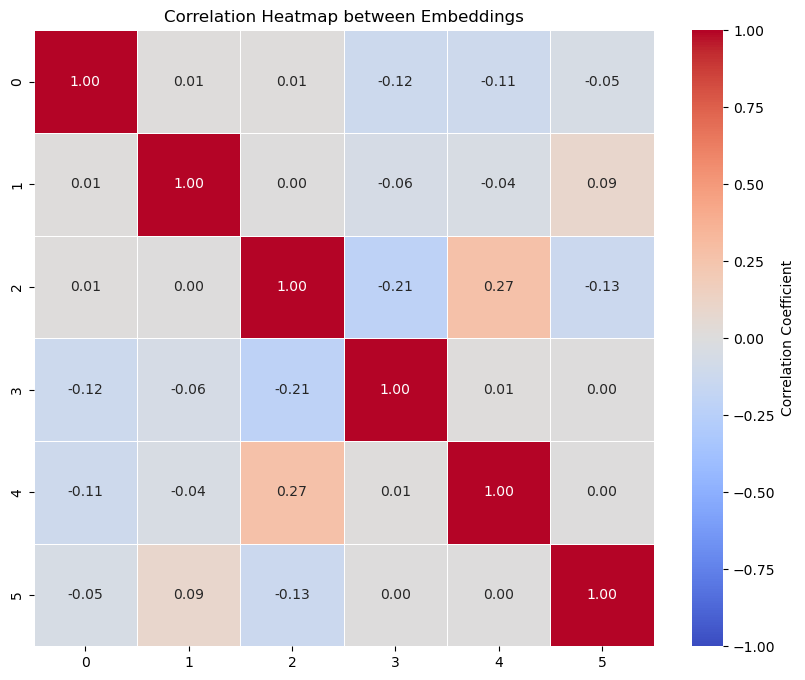

In [23]:
plot_correlation_heatmap(embeddings_scaled_3d_s1_10000_story_1_adapt_5000, embeddings_scaled_3d_s2_10000_story_1_adapt_5000 )

# Plotting CEBRA Embeddings with Custom Labels

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

def plot_custom_embedding_with_variance_story_binary(embeddings, embedding_labels, title="CEBRA TIme Plot Story based"):
    """
    Plots the embedding with a custom colormap and labels, selecting the best dimensions based on variance.

    Parameters:
    - embeddings: The embedding data to be plotted (numpy array or tensor of shape [samples, dimensions]).
    - embedding_labels: The labels for the embeddings (categorical indices corresponding to the colormap).
    - title: Title of the plot.
    """
    # Compute variance for each dimension
    variances = np.var(embeddings, axis=0)
    top_dims = np.argsort(variances)[-3:]
    print(top_dims)  # Select top 3 dimensions with highest variance

    # Get unique labels and their counts
    unique_labels, label_counts = np.unique(embedding_labels, return_counts=True)

    # Create a dynamic colormap based on the number of unique labels
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    custom_cmap = ListedColormap(colors)

    # Create a scalar mappable object for the colorbar
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=0, vmax=len(unique_labels) - 1))

    # Plot the embedding
    ax = cebra.plot_embedding(
        embeddings,
        embedding_labels=embedding_labels,
        idx_order=top_dims[::-1],
        cmap=custom_cmap,
        markersize=20,
        alpha=0.5,
        title=title
    )

    # Add a colorbar with dynamic labels
    cbar = plt.colorbar(sm, ax=ax, ticks=np.arange(len(unique_labels)))

    # Customize colorbar labels and position
    cbar.ax.set_yticklabels(unique_labels)  # Set colorbar labels
    cbar.ax.tick_params(labelsize=10)  # Adjust tick label size
    cbar.ax.set_position([0.15, 0.2, 0.03, 0.6])  # Manually adjust colorbar position

    # Prevent overlaps
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

def encode_labels(csv_file, column_name):
    """
    Encode labels in a CSV file using LabelEncoder.

    Parameters:
    csv_file (str): Path to the CSV file.
    column_name (str): Name of the column to encode.

    Returns:
    None
    """
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Ensure we take exactly 521 values from the dataset
    if len(df) < 521:
        raise ValueError("CSV must contain at least 521 rows!")

    # Step 1: Create the new label list of size 526
    new_labels = ['0', '0']  # First two unknown values

    # Take exactly 521 values from df
    new_labels.extend(df[column_name][:521].tolist())

    # Last three unknown values
    new_labels.extend(['0', '0', '0'])

    # Step 2: Label encode
    le = LabelEncoder()
    encoded_labels = le.fit_transform(new_labels)  # Converts categories to numbers

    # Step 3: Convert to a 1D NumPy array
    label_array_ner = np.array(encoded_labels)

    # Output results
    print("Encoded Labels (1D Array):", label_array_ner)
    print("Label Mapping:", dict(zip(le.classes_, range(len(le.classes_)))))

    # Check final size
    print("Final array size:", len(label_array_ner))  # Should be 526

In [17]:
import numpy as np

# Create an array with first 526 values as 0 and the next 526 values as 1
arr = np.concatenate([np.zeros(526), np.ones(526)])

[1 0 2]


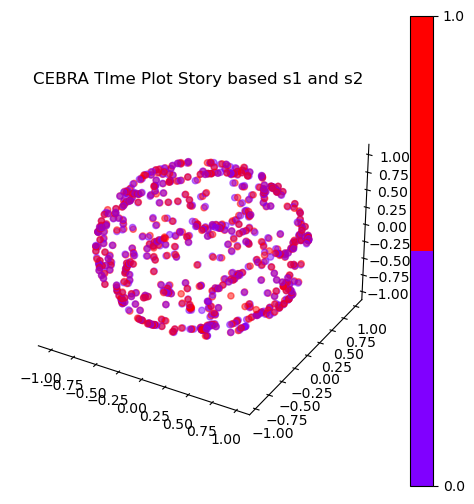

In [21]:
plot_custom_embedding_with_variance_story_binary(embeddings_scaled_3d_s1_10000_story_1, arr, title="CEBRA TIme Plot Story based s1 and s2")

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

def encode_labels(csv_file, column_name):
    """
    Encode labels in a CSV file using LabelEncoder.

    Parameters:
    csv_file (str): Path to the CSV file.
    column_name (str): Name of the column to encode.

    Returns:
    None
    """
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Ensure we take exactly 521 values from the dataset
    if len(df) < 521:
        raise ValueError("CSV must contain at least 521 rows!")

    # Step 1: Create the new label list of size 526
    new_labels = ['0', '0']  # First two unknown values

    # Take exactly 521 values from df
    new_labels.extend(df[column_name][:521].tolist())

    # Last three unknown values
    new_labels.extend(['0', '0', '0'])

    # Step 2: Label encode
    le = LabelEncoder()
    encoded_labels = le.fit_transform(new_labels)  # Converts categories to numbers

    # Step 3: Convert to a 1D NumPy array
    label_array_ner = np.array(encoded_labels)

    # Output results
    print("Encoded Labels (1D Array):", label_array_ner)
    print("Label Mapping:", dict(zip(le.classes_, range(len(le.classes_)))))

    # Check final size
    print("Final array size:", len(label_array_ner))  # Should be 526
    
    return label_array_ner

In [ ]:
# Example usage:
encode_labels('labeled_sentences_wsd (3).csv', 'label')

# Plotting CEBRA Embeddings using tsne,umap,FastICA and PCA

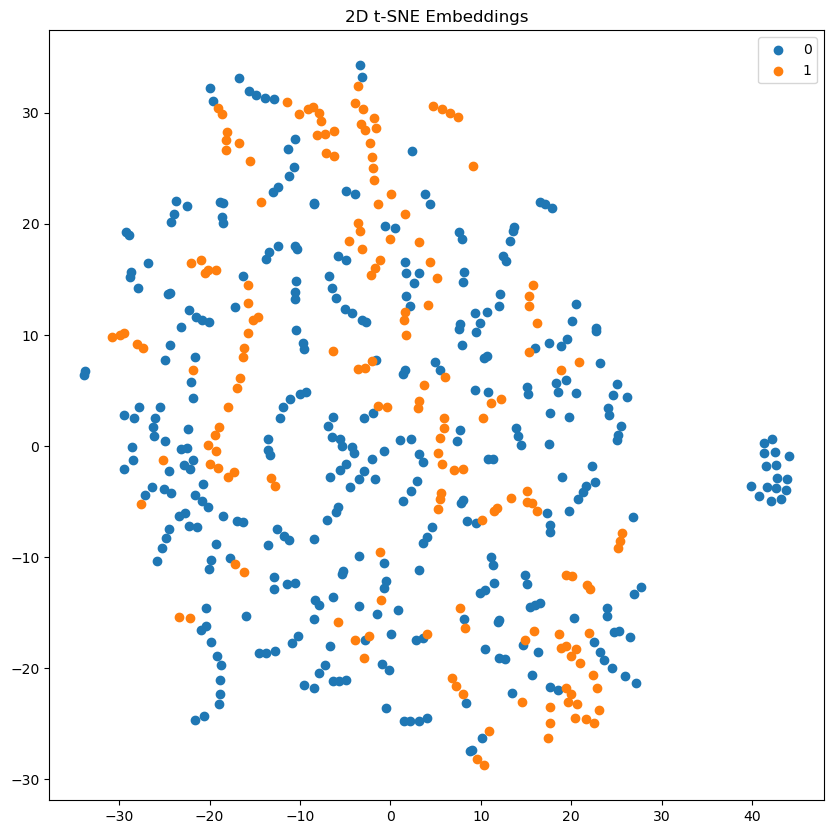

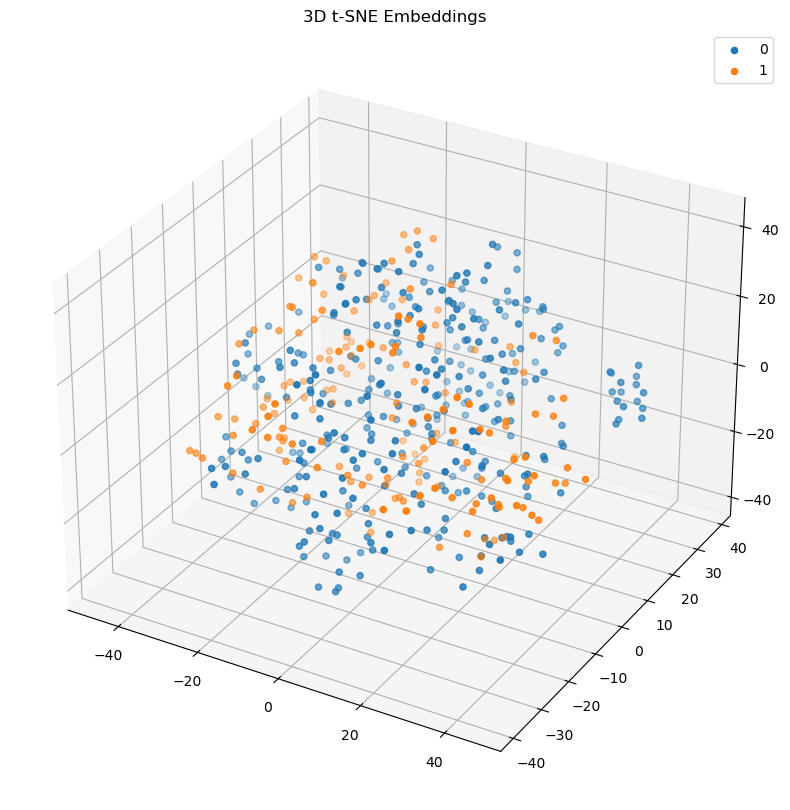

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def reduce_embeddings_tsne(embeddings, labels, n_dimensions):
    """
    Reduce embeddings to n_dimensions using t-SNE.

    Args:
        embeddings (numpy array): The embeddings to reduce.
        n_dimensions (int): The number of dimensions to reduce to (2 or 3).

    Returns:
        reduced_embeddings (numpy array): The reduced embeddings.
    """
    if n_dimensions not in [2, 3]:
        raise ValueError("n_dimensions must be 2 or 3")

    tsne = TSNE(n_components=n_dimensions, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)

    if n_dimensions == 2:
        plt.figure(figsize=(10, 10))
        for label in np.unique(labels):
            mask = labels == label
            plt.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1], label=label)
        plt.title("2D t-SNE Embeddings")
        plt.legend()
        plt.show()
    elif n_dimensions == 3:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(labels):
            mask = labels == label
            ax.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1], reduced_embeddings[mask, 2], label=label)
        plt.title("3D t-SNE Embeddings")
        plt.legend()
        plt.show()

    return reduced_embeddings


In [ ]:
reduced_embeddings_2d = reduce_embeddings_tsne(tensor_1, labels, 2)
reduced_embeddings_3d = reduce_embeddings_tsne(tensor_1, labels, 3)

2025-03-05 11:25:35.985188: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-05 11:25:38.994125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741170339.586334   25709 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741170339.785658   25709 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 11:25:41.826935: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

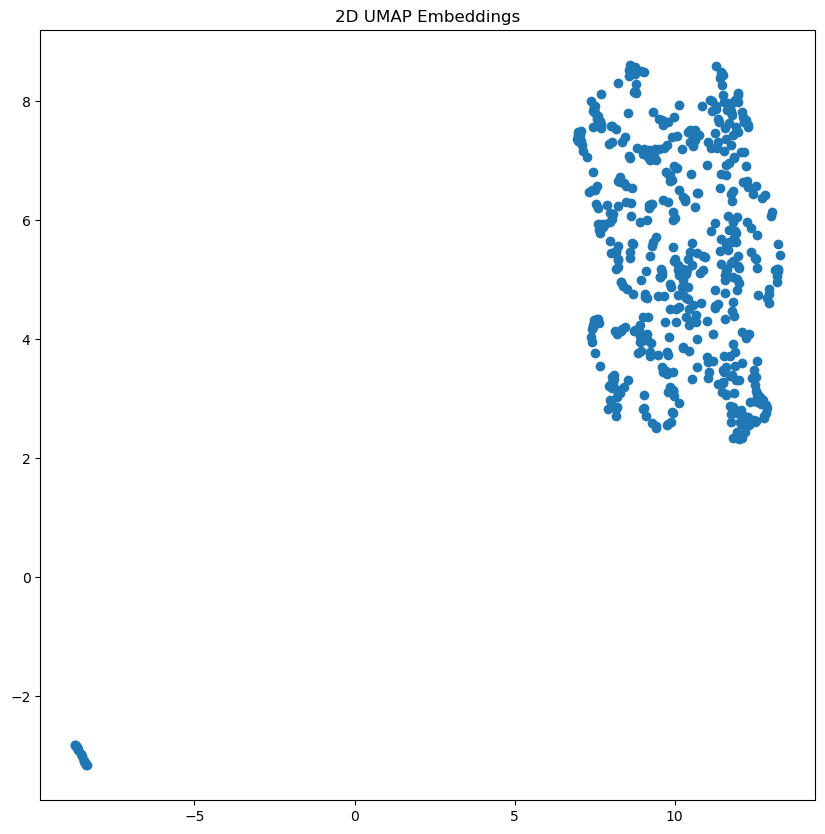

/u/pdjoshi/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


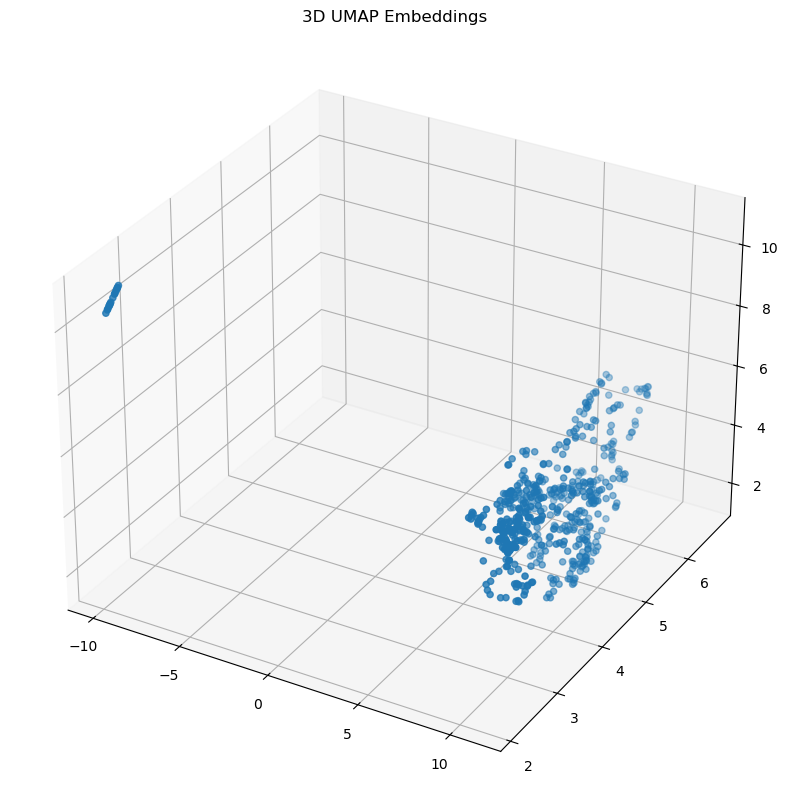

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import umap

def reduce_embeddings_umap(embeddings, n_dimensions):
    """
    Reduce embeddings to n_dimensions using UMAP.

    Args:
        embeddings (numpy array): The embeddings to reduce.
        n_dimensions (int): The number of dimensions to reduce to (2 or 3).

    Returns:
        reduced_embeddings (numpy array): The reduced embeddings.
    """
    if n_dimensions not in [2, 3]:
        raise ValueError("n_dimensions must be 2 or 3")

    reducer = umap.UMAP(n_components=n_dimensions, random_state=42)
    reduced_embeddings = reducer.fit_transform(embeddings)

    if n_dimensions == 2:
        plt.figure(figsize=(10, 10))
        plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
        plt.title("2D UMAP Embeddings")
        plt.show()
    elif n_dimensions == 3:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2])
        plt.title("3D UMAP Embeddings")
        plt.show()

    return reduced_embeddings

In [ ]:
reduced_embeddings_2d = reduce_embeddings_umap(tensor_1, 2)
reduced_embeddings_3d = reduce_embeddings_umap(tensor_1, 3)

/u/pdjoshi/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


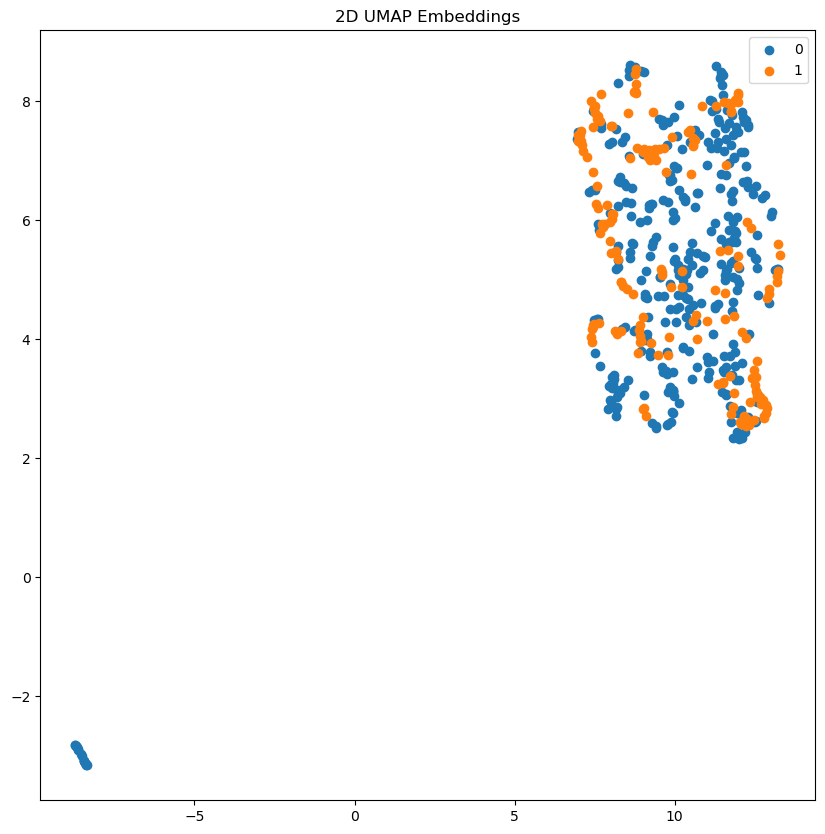

/u/pdjoshi/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


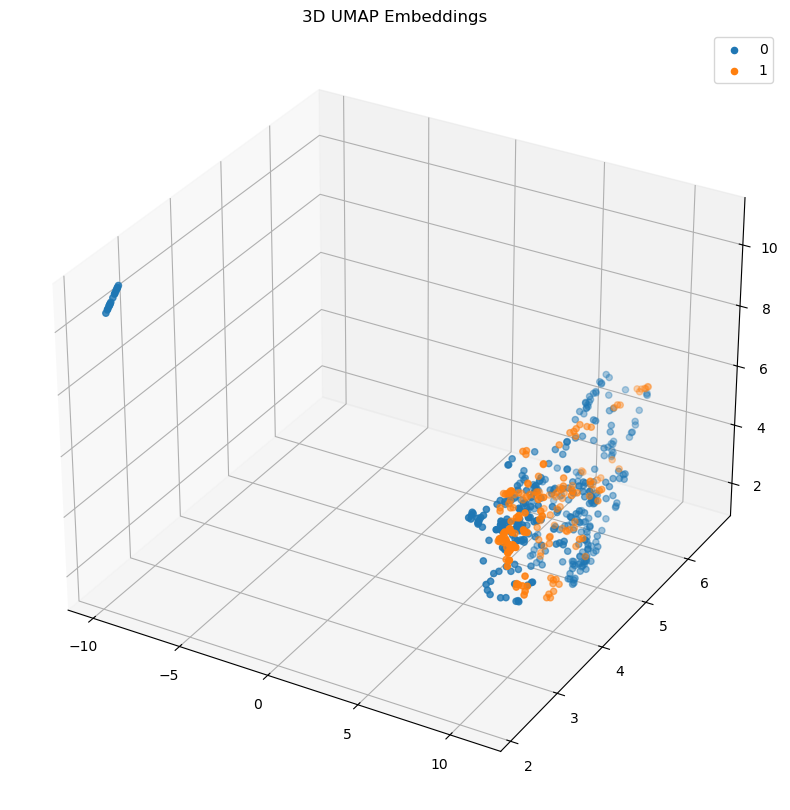

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import umap

def reduce_embeddings_umap_labels(embeddings, labels, n_dimensions):
    """
    Reduce embeddings to n_dimensions using UMAP.

    Args:
        embeddings (numpy array): The embeddings to reduce.
        labels (numpy array): The labels for the embeddings.
        n_dimensions (int): The number of dimensions to reduce to (2 or 3).

    Returns:
        reduced_embeddings (numpy array): The reduced embeddings.
    """
    if n_dimensions not in [2, 3]:
        raise ValueError("n_dimensions must be 2 or 3")

    reducer = umap.UMAP(n_components=n_dimensions, random_state=42)
    reduced_embeddings = reducer.fit_transform(embeddings)

    if n_dimensions == 2:
        plt.figure(figsize=(10, 10))
        for label in np.unique(labels):
            mask = labels == label
            plt.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1], label=label)
        plt.title("2D UMAP Embeddings")
        plt.legend()
        plt.show()
    elif n_dimensions == 3:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(labels):
            mask = labels == label
            ax.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1], reduced_embeddings[mask, 2], label=label)
        plt.title("3D UMAP Embeddings")
        plt.legend()
        plt.show()

    return reduced_embeddings

In [ ]:
reduced_embeddings_2d = reduce_embeddings_umap_labels(tensor_1, labels, 2)
reduced_embeddings_3d = reduce_embeddings_umap_labels(tensor_1, labels, 3)

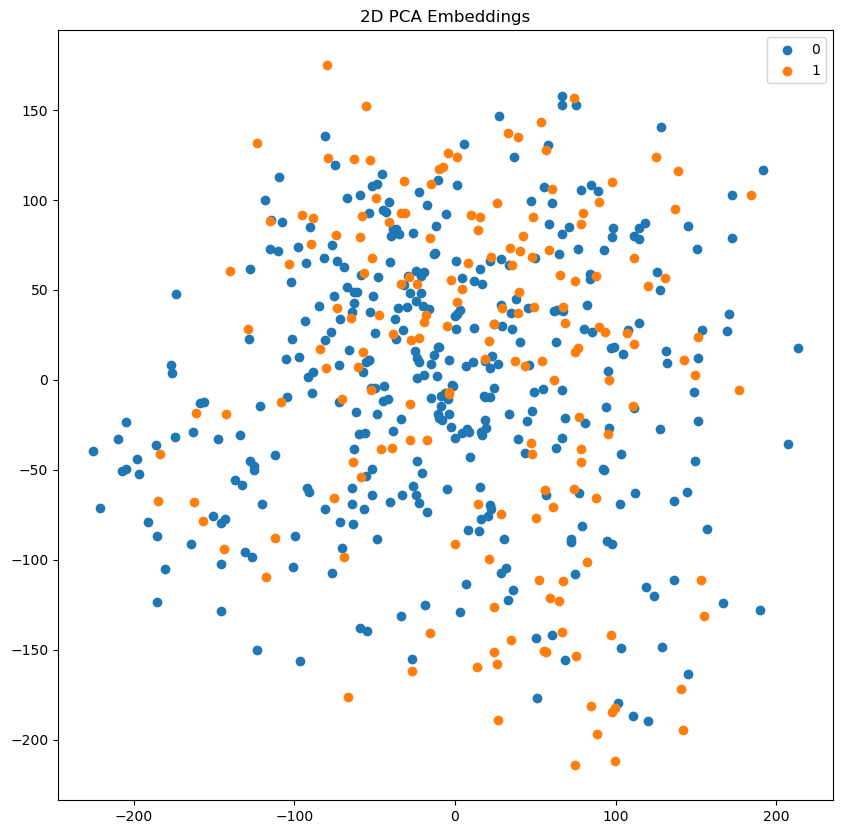

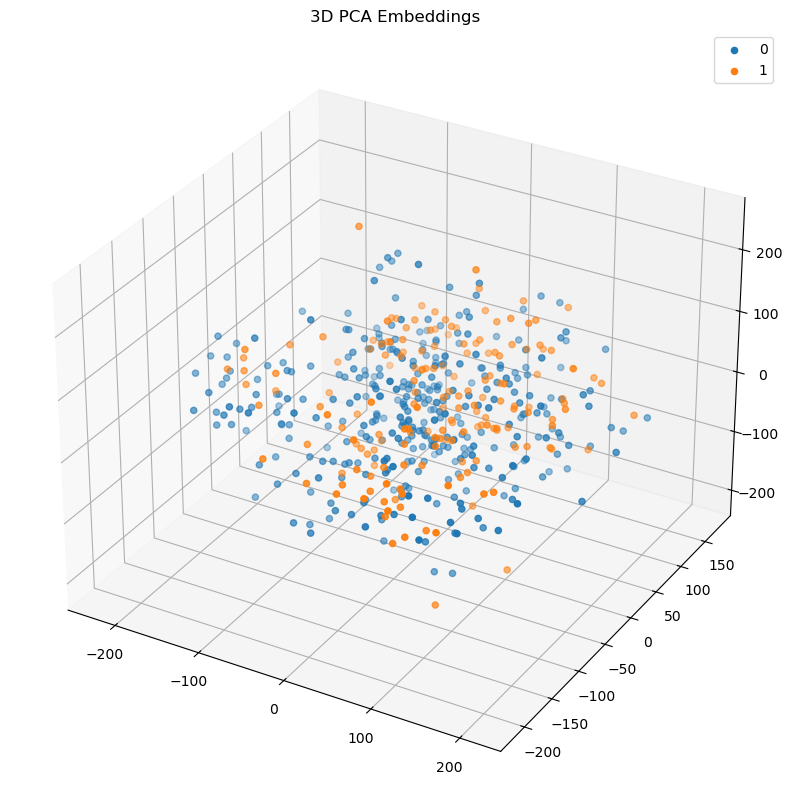

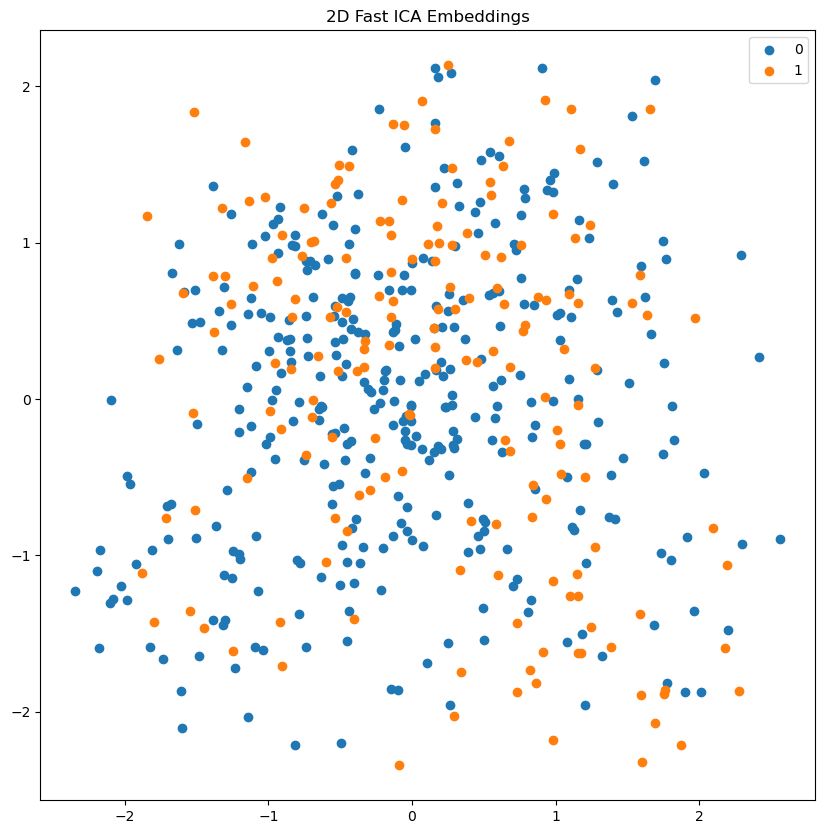

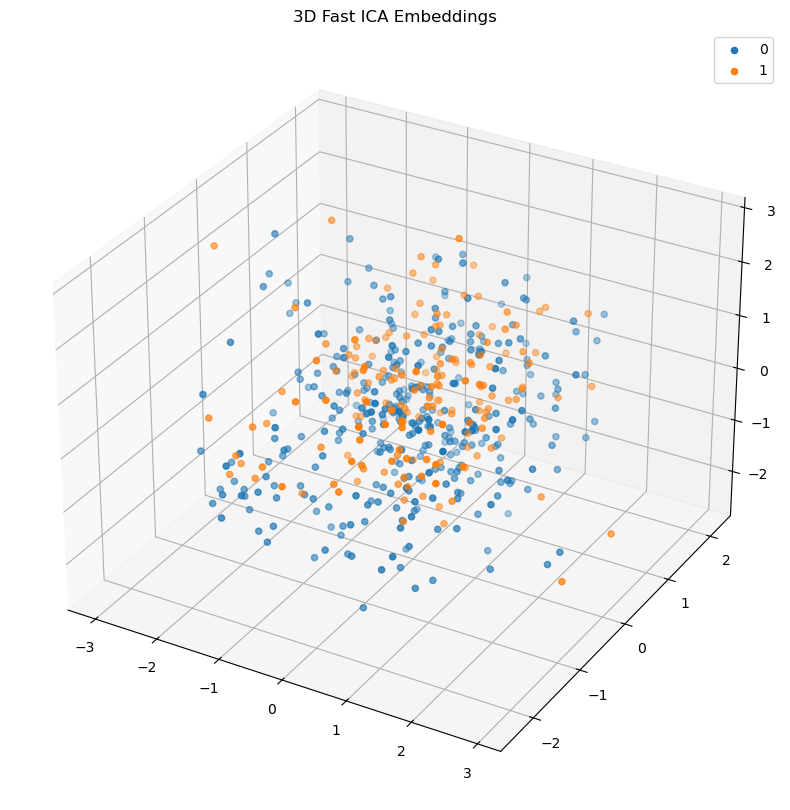

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

def reduce_embeddings_pca(embeddings, labels, n_dimensions):
    """
    Reduce embeddings to n_dimensions using PCA.

    Args:
        embeddings (numpy array): The embeddings to reduce.
        labels (numpy array): The labels for the embeddings.
        n_dimensions (int): The number of dimensions to reduce to (2 or 3).

    Returns:
        reduced_embeddings (numpy array): The reduced embeddings.
    """
    if n_dimensions not in [2, 3]:
        raise ValueError("n_dimensions must be 2 or 3")

    pca = PCA(n_components=n_dimensions, random_state=42)
    reduced_embeddings = pca.fit_transform(embeddings)

    if n_dimensions == 2:
        plt.figure(figsize=(10, 10))
        for label in np.unique(labels):
            mask = labels == label
            plt.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1], label=label)
        plt.title("2D PCA Embeddings")
        plt.legend()
        plt.show()
    elif n_dimensions == 3:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(labels):
            mask = labels == label
            ax.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1], reduced_embeddings[mask, 2], label=label)
        plt.title("3D PCA Embeddings")
        plt.legend()
        plt.show()

    return reduced_embeddings

def reduce_embeddings_fast_ica(embeddings, labels, n_dimensions):
    """
    Reduce embeddings to n_dimensions using Fast ICA.

    Args:
        embeddings (numpy array): The embeddings to reduce.
        labels (numpy array): The labels for the embeddings.
        n_dimensions (int): The number of dimensions to reduce to (2 or 3).

    Returns:
        reduced_embeddings (numpy array): The reduced embeddings.
    """
    if n_dimensions not in [2, 3]:
        raise ValueError("n_dimensions must be 2 or 3")

    ica = FastICA(n_components=n_dimensions, random_state=42)
    reduced_embeddings = ica.fit_transform(embeddings)

    if n_dimensions == 2:
        plt.figure(figsize=(10, 10))
        for label in np.unique(labels):
            mask = labels == label
            plt.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1], label=label)
        plt.title("2D Fast ICA Embeddings")
        plt.legend()
        plt.show()
    elif n_dimensions == 3:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(labels):
            mask = labels == label
            ax.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1], reduced_embeddings[mask, 2], label=label)
        plt.title("3D Fast ICA Embeddings")
        plt.legend()
        plt.show()

    return reduced_embeddings

In [ ]:
reduced_embeddings_2d_pca = reduce_embeddings_pca(tensor_1, labels, 2)
reduced_embeddings_3d_pca = reduce_embeddings_pca(tensor_1, labels, 3)

reduced_embeddings_2d_fast_ica = reduce_embeddings_fast_ica(tensor_1, labels, 2)
reduced_embeddings_3d_fast_ica = reduce_embeddings_fast_ica(tensor_1, labels, 3)

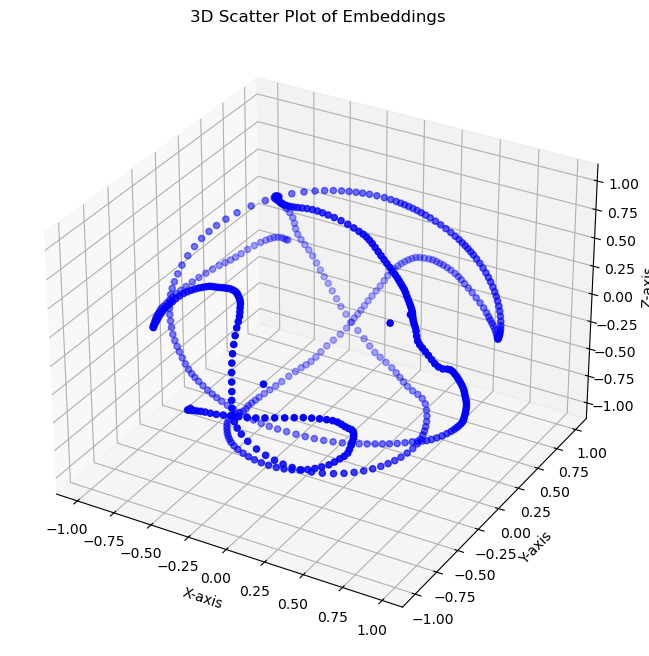

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embedding (526,3)
e  # Update with actual file path

# Extract X, Y, Z coordinates
x = e[:, 0]  # First column as X
y = e[:, 1]  # Second column as Y
z = e[:, 2]  # Third column as Z

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b', s=20, marker='o')  # Scatter plot

# Labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Scatter Plot of Embeddings")

plt.show()
